In [1]:
# Importing Laibraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
crimeData = pd.read_csv('Crimes_2012-2016.csv')
print('Total number of crime in the dataset: {}'.format(len(crimeData)))
crimeData.head()

Total number of crime in the dataset: 1136589


,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,Location.1
0,03/20/2013,132007717,03/20/2013,2015,20,Olympic,2004,997,TRAFFIC DR #,UNK,Unknown,OXFORD,OAKWOOD,"(34.0776, -118.308)"
1,03/10/2013,130608787,03/10/2013,445,6,Hollywood,635,997,TRAFFIC DR #,UNK,Unknown,ODIN ST,CAHUENGA BL,"(34.1113, -118.3336)"
2,12/18/2013,131820260,12/18/2013,745,18,Southeast,1839,997,TRAFFIC DR #,UNK,Unknown,105TH ST,CROESUS AV,"(33.9406, -118.2338)"
3,10/18/2013,131817514,10/18/2013,1730,18,Southeast,1827,997,TRAFFIC DR #,UNK,Unknown,101ST ST,JUNIPER ST,"(33.9449, -118.2332)"
4,05/26/2013,130510483,05/25/2013,2000,5,Harbor,507,440,THEFT PLAIN - PETTY (UNDER $400),UNK,Unknown,1300 W SEPULVEDA BL,NaN,"(33.8135, -118.2992)"


In [3]:
crimeData.shape

(1136589, 14)

In [5]:
# Listing crimw types
crimeByType = crimeData['CrmCd.Desc'].value_counts()
crimeByType

CrmCd.Desc
TRAFFIC DR #                               167051
BATTERY - SIMPLE ASSAULT                    90224
VEHICLE - STOLEN                            73346
BURGLARY FROM VEHICLE                       72511
BURGLARY                                    69410
                                            ...  
TILL TAP - GRAND THEFT ($950.01 & OVER)         3
MANSLAUGHTER, NEGLIGENT                         2
BLOCKING DOOR INDUCTION CENTER                  2
THEFT, COIN MACHINE - GRAND                     1
HOMICIDE (NON-UCR)                              1
Name: count, Length: 161, dtype: int64

<Axes: xlabel='year'>

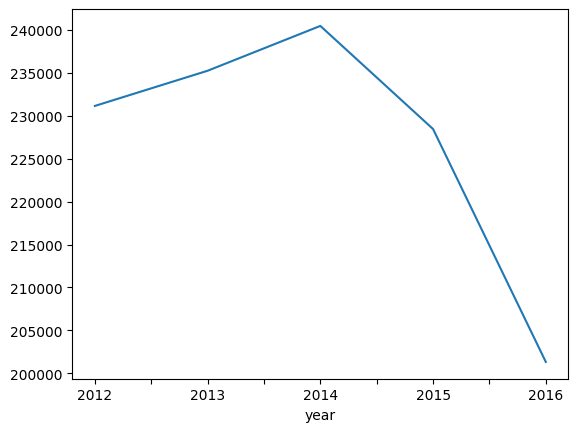

In [6]:
crimeData['year'] = pd.Series(crimeData['Date.Rptd'].str[-4:], index=crimeData.index)
crimeByYear = crimeData['year'].value_counts(sort=False).sort_index()
crimeByYear.plot(kind='line')

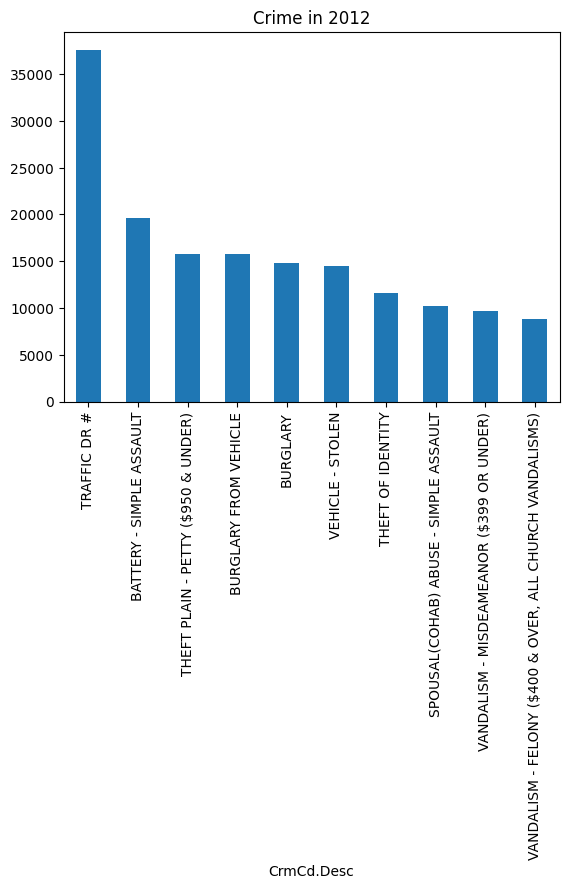

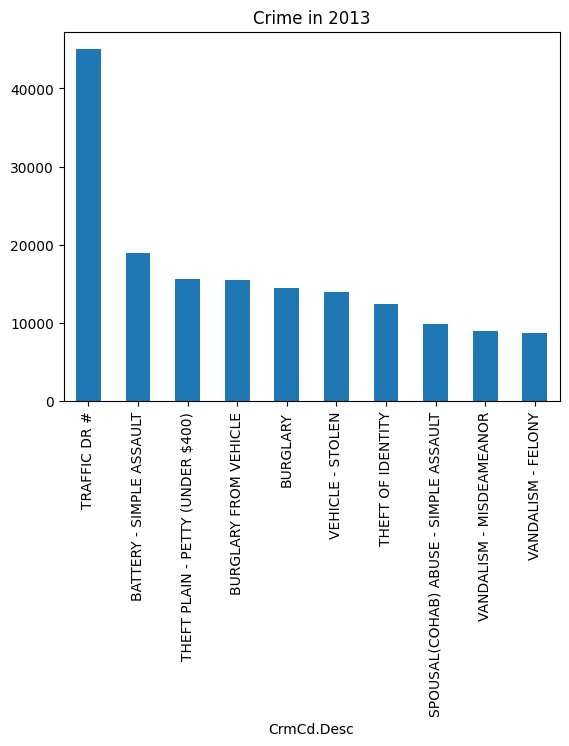

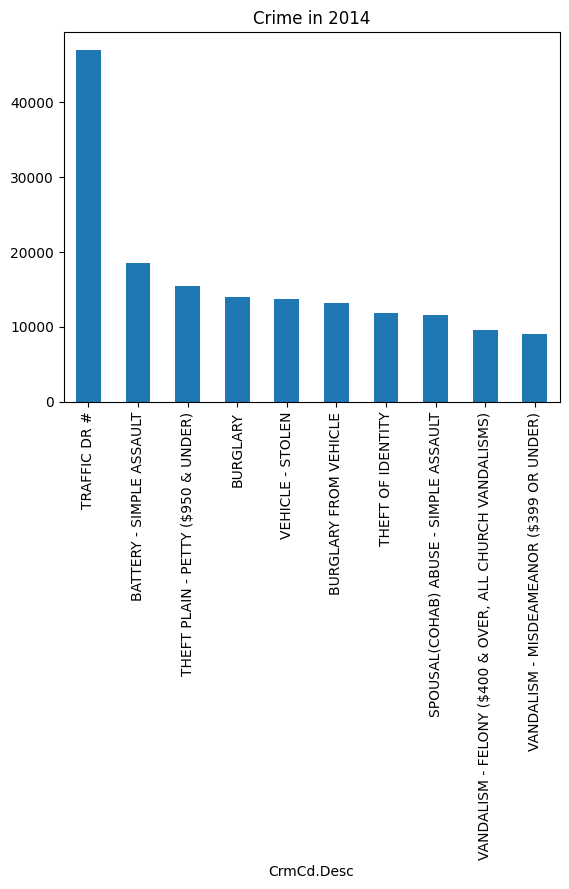

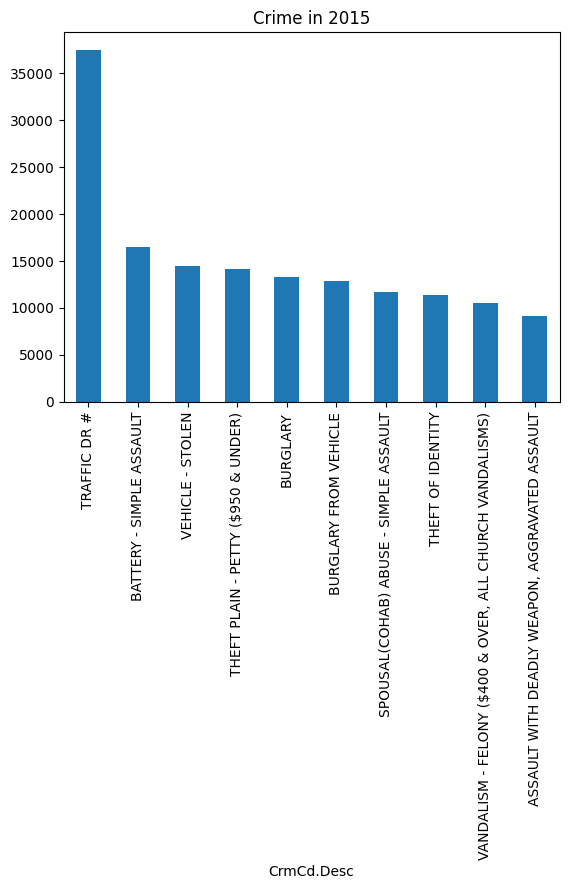

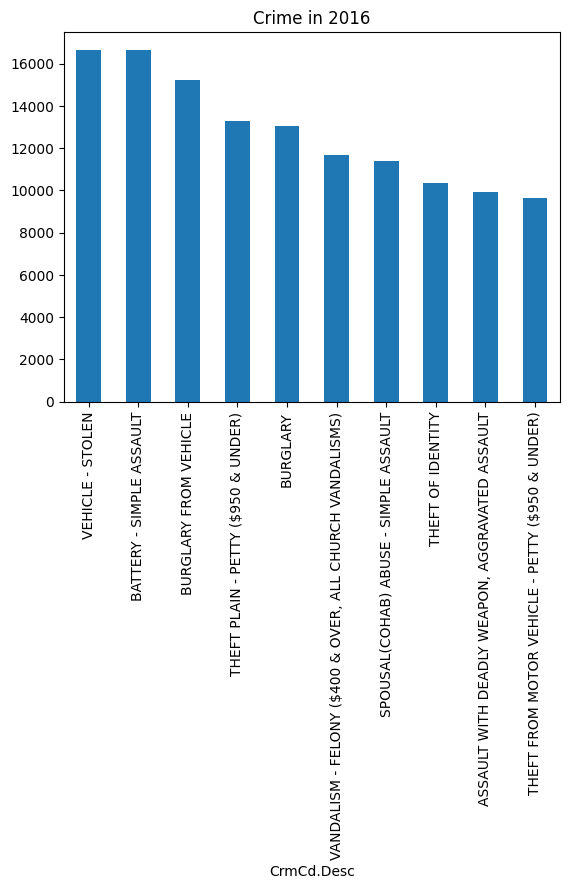

In [7]:
for year in crimeByYear.keys():
    crimeYear = crimeData[crimeData['year'] == year]['CrmCd.Desc'].value_counts()[:10]
    crimeYear = crimeYear.plot(kind='bar', title='Crime in ' + year)
    plt.show()

In [8]:
# Listing Crime Areas
crimeData['AREA.NAME'].value_counts()

AREA.NAME
77th Street    77928
Southwest      72937
N Hollywood    61851
Pacific        60798
Southeast      57369
Mission        56274
Van Nuys       54895
Northeast      54711
Olympic        52796
Newton         52626
Hollywood      52524
Devonshire     52012
Topanga        51534
West LA        51276
Central        49561
West Valley    49070
Harbor         48960
Wilshire       48746
Rampart        47595
Hollenbeck     41717
Foothill       41409
Name: count, dtype: int64

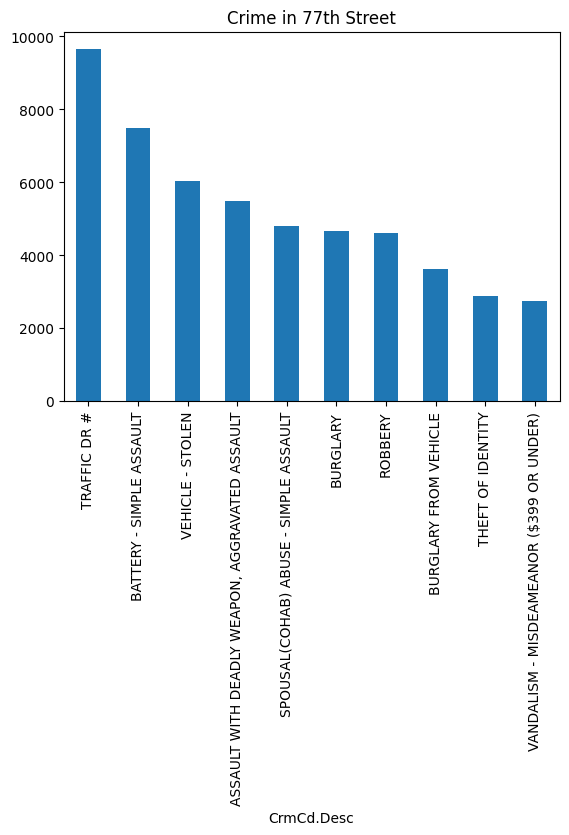

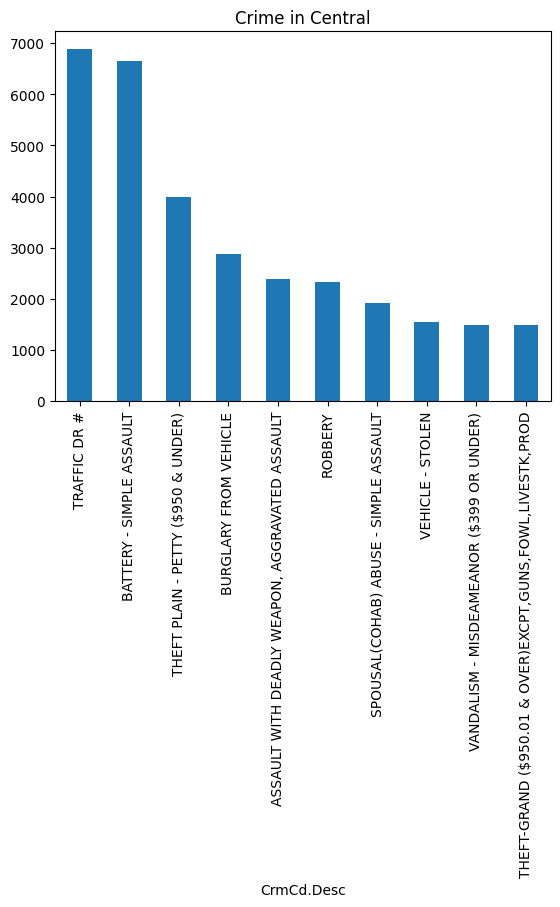

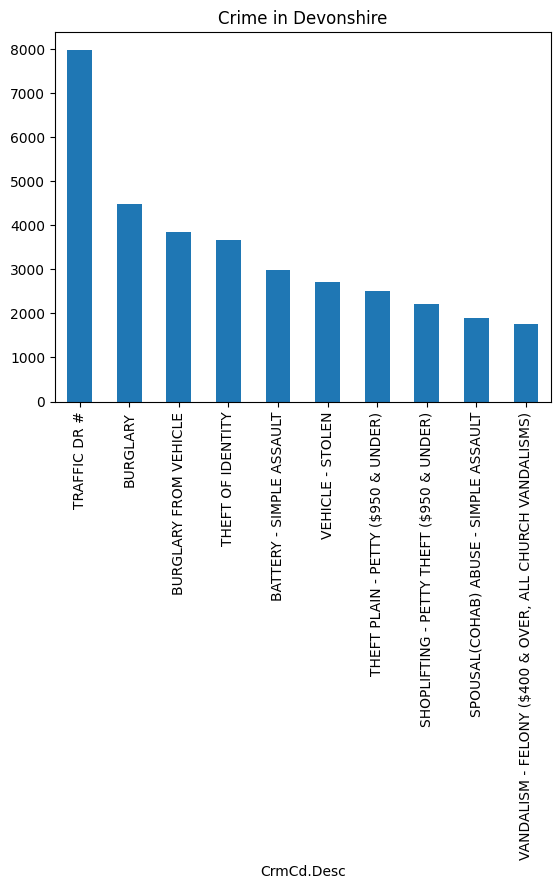

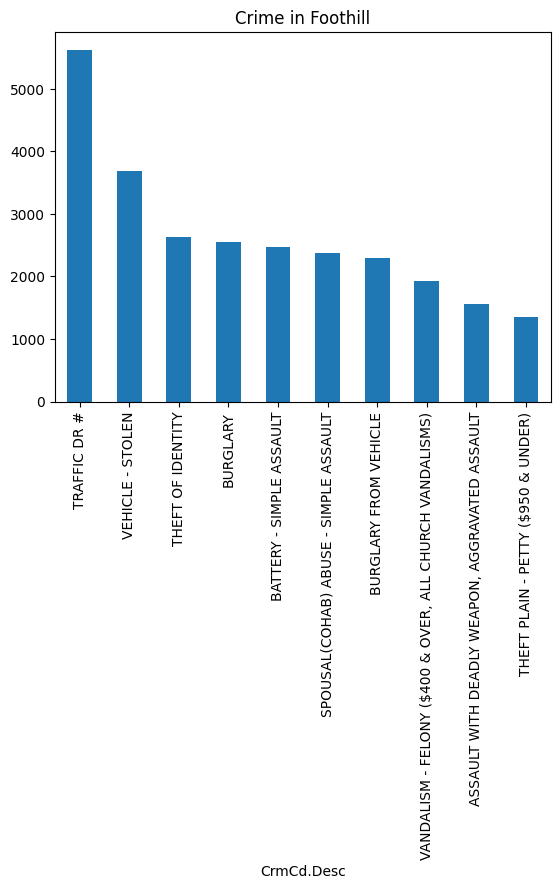

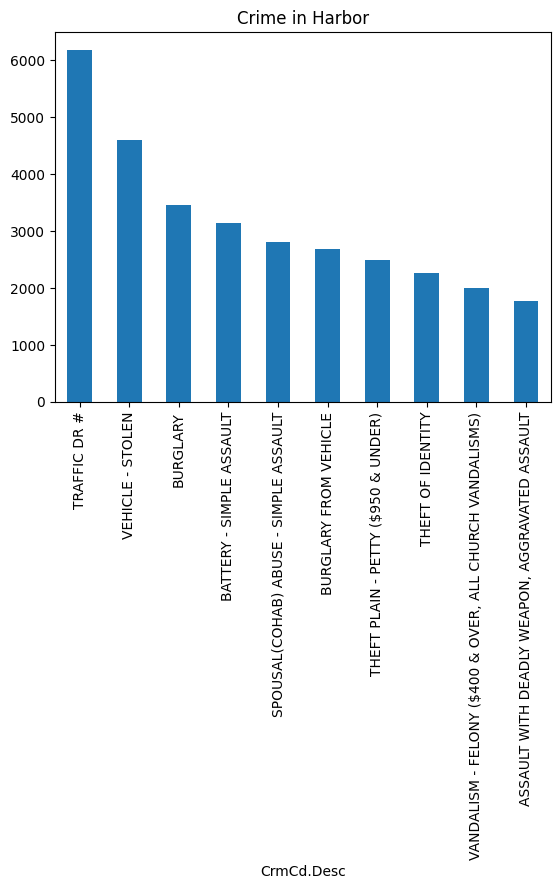

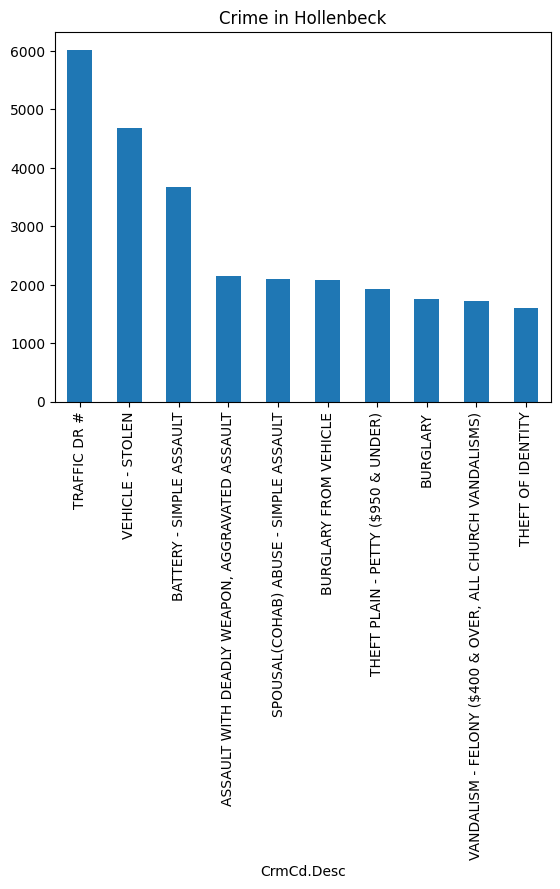

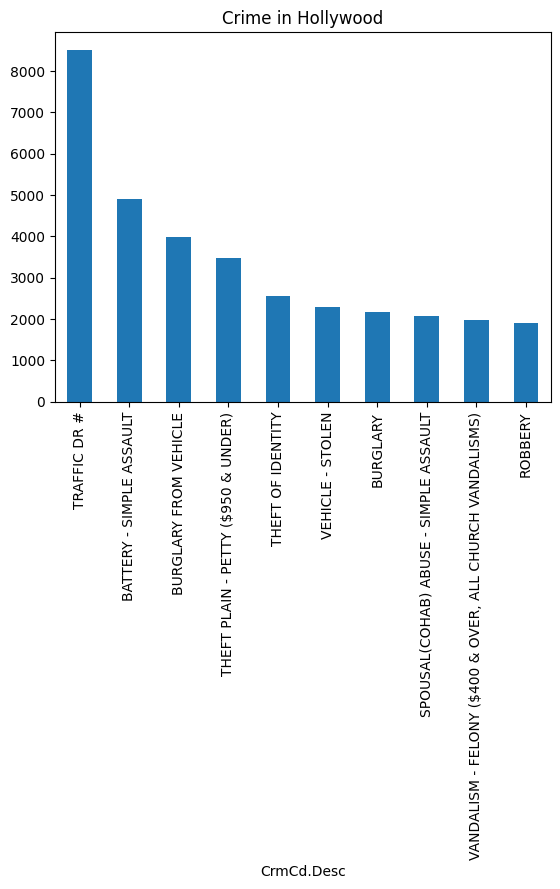

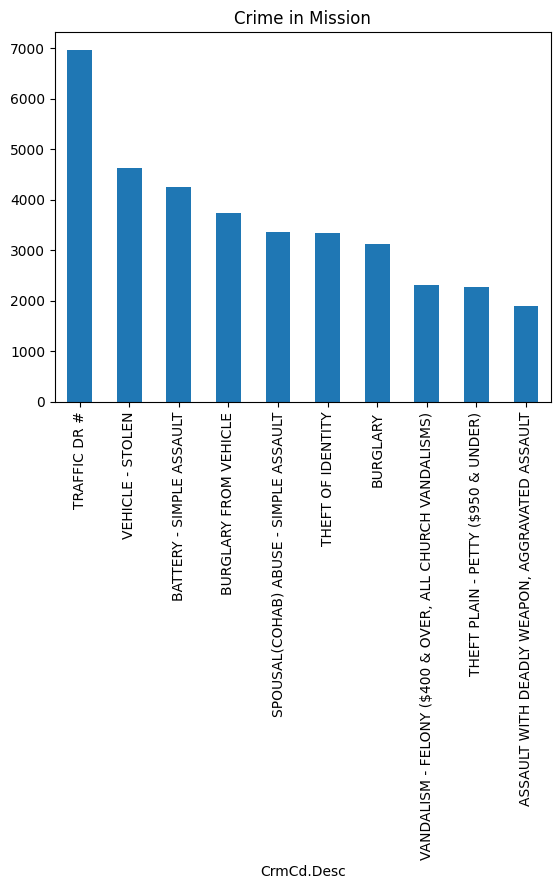

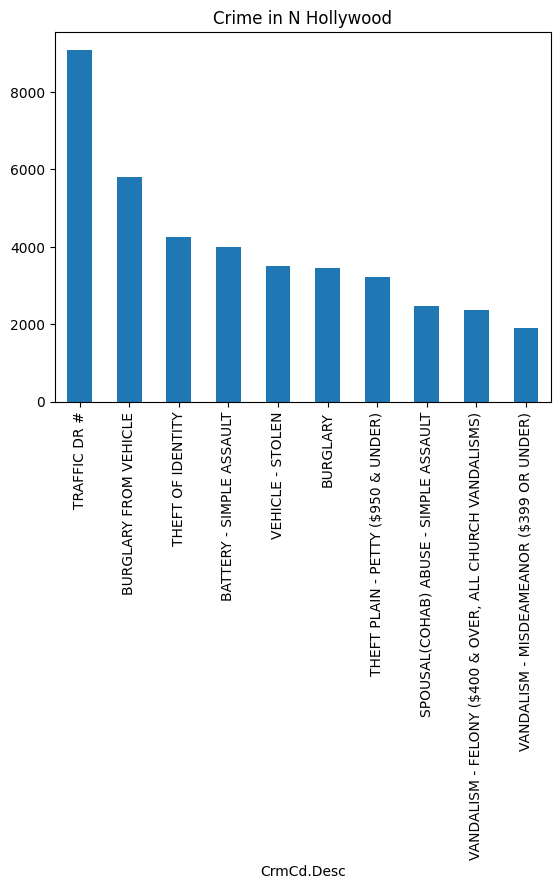

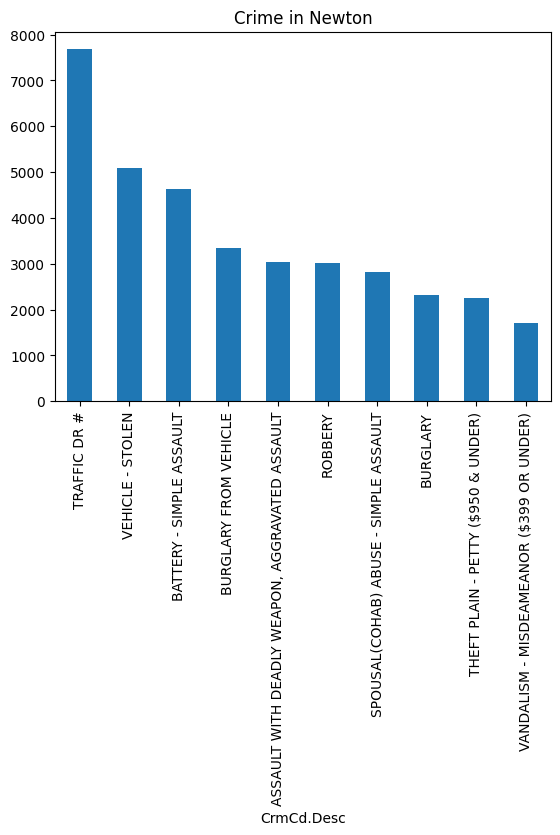

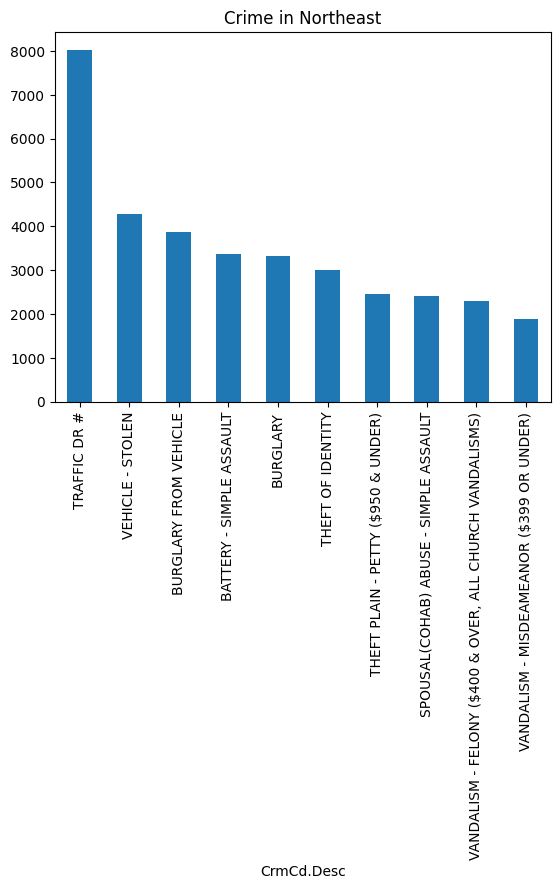

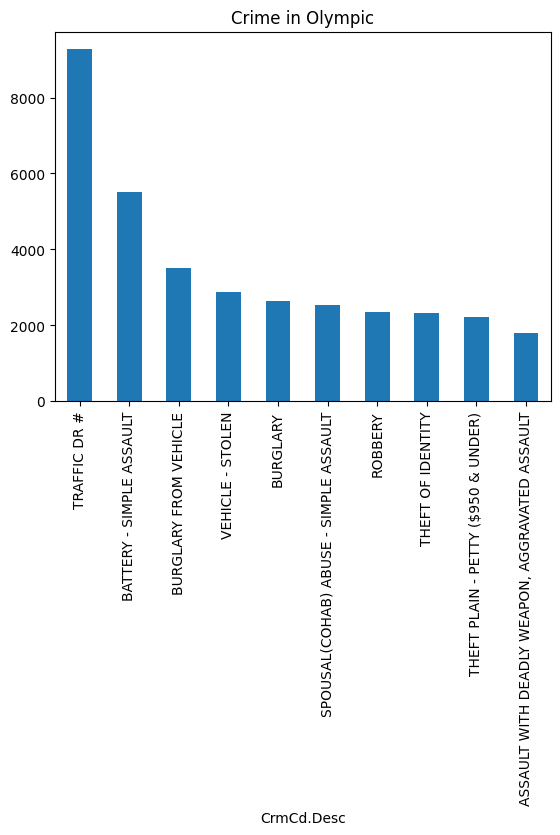

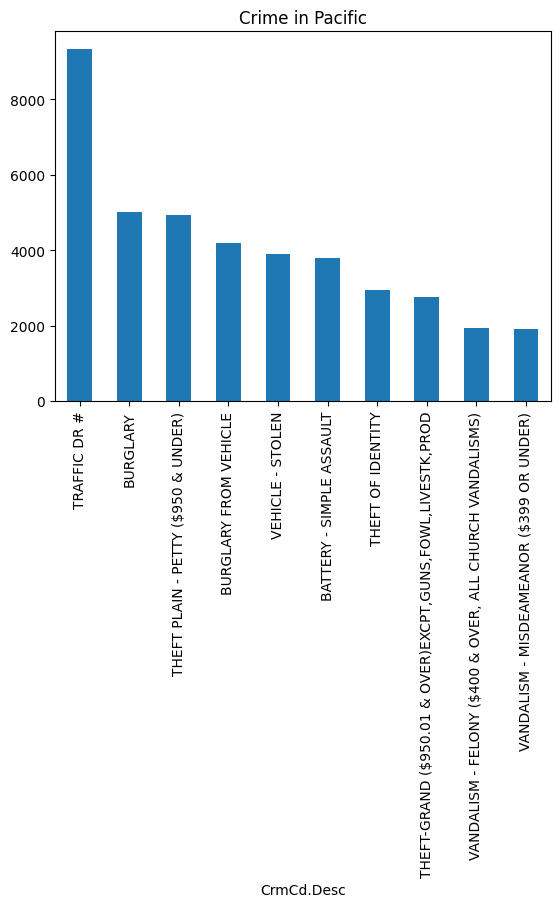

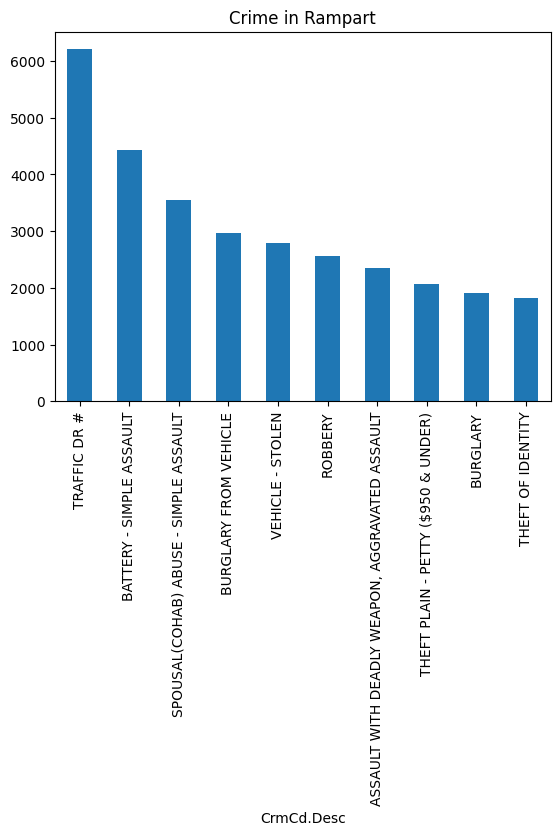

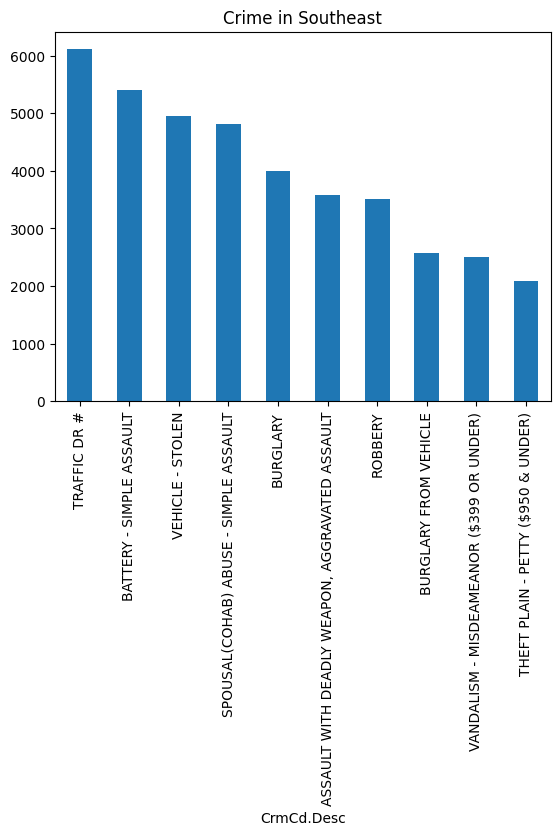

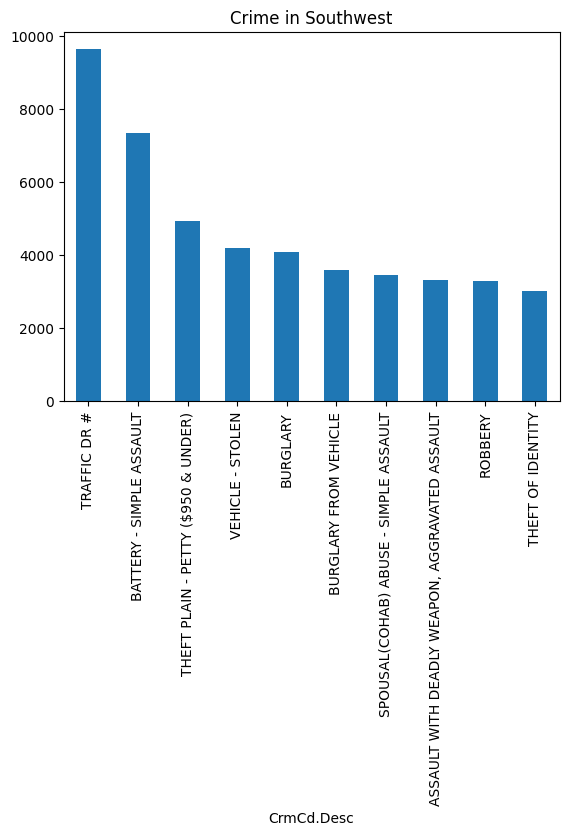

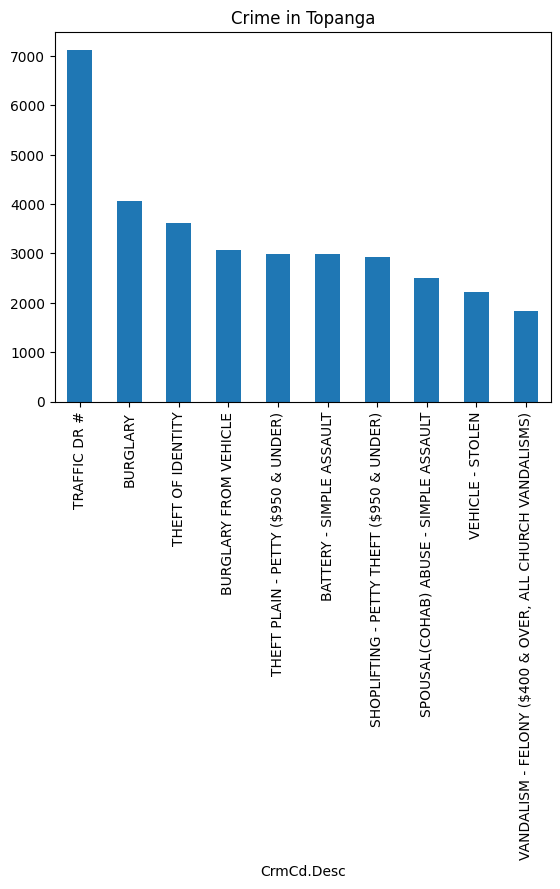

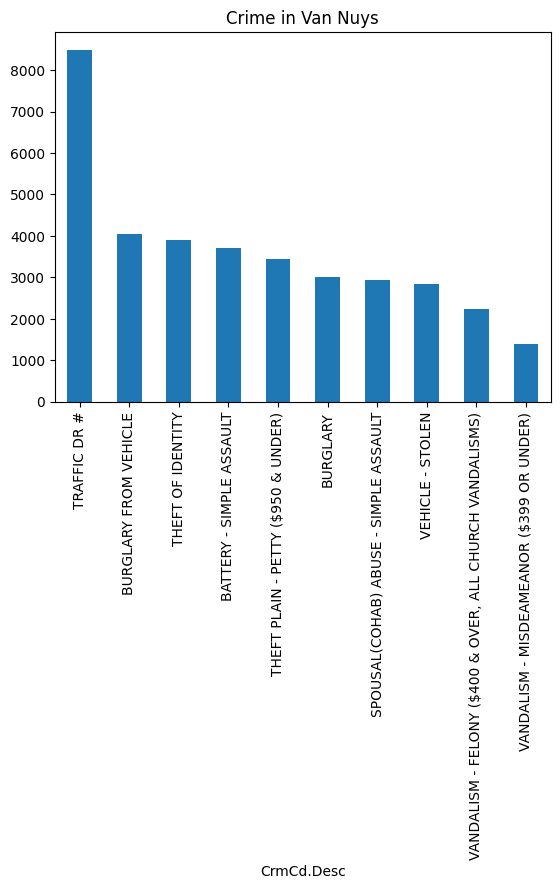

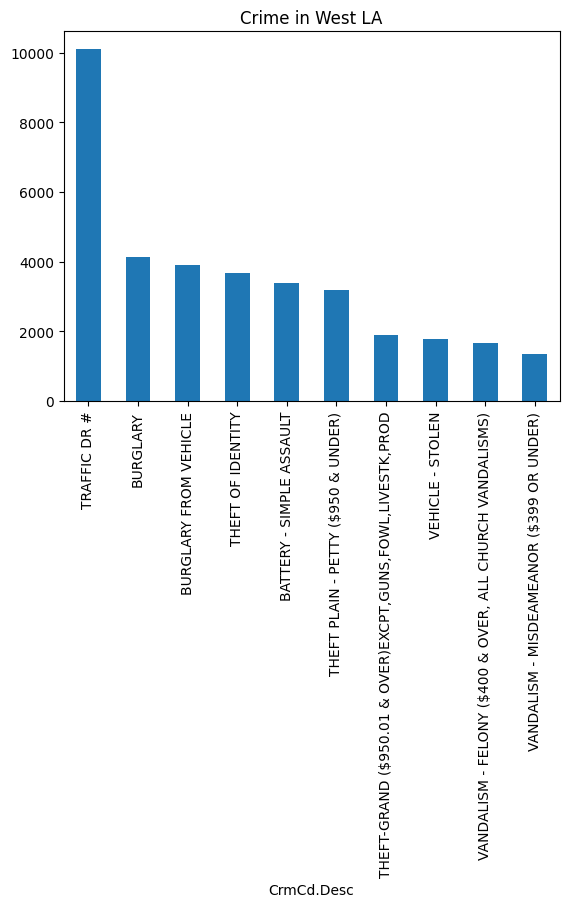

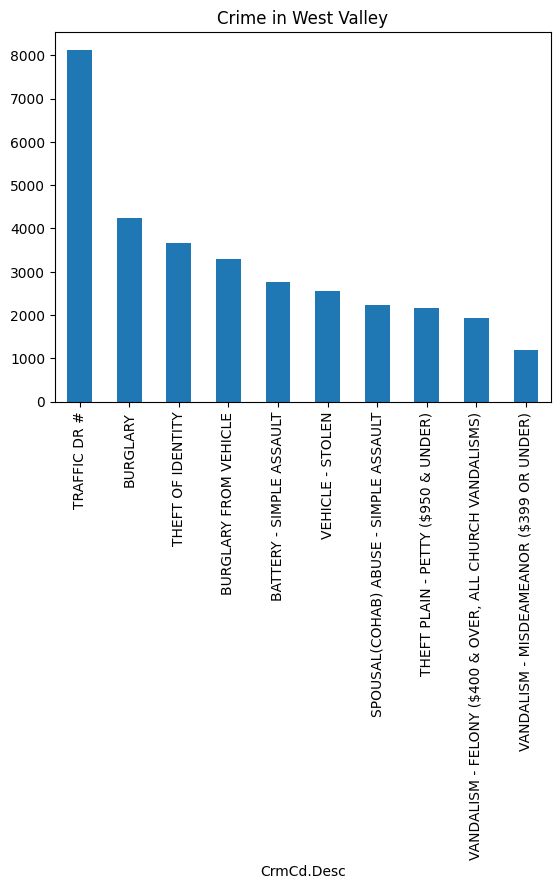

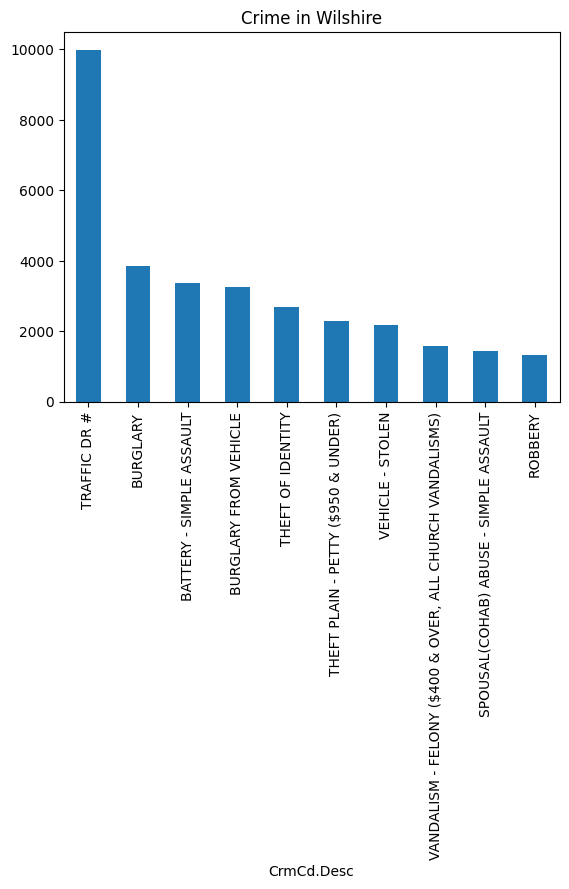

In [15]:
# Graph the 10 most commom crimws in the each area
crimeByArea = crimeData['AREA.NAME'].value_counts().sort_index()
crimeCommonType = {}
for area in crimeByArea.keys():
    crimeArea = crimeData[crimeData['AREA.NAME'] == area]['CrmCd.Desc'].value_counts()[:10]
    for crType in crimeCommonType:
        if not crType in crimeCommonType:
            crimeCommonType[crType] = [area]
        else:
            crimeCommonType[crType].append(area)
    crimeArea = crimeArea.plot(kind='bar', title='Crime in ' + area)
    plt.show()

In [17]:
# Repersenting the most common crimes for each city:
# data = np.array([[False for i in list(crimeCommonType.keys())] for j in list(crimeByArea.keys())])
# crimeOccur = pd.DataFrame(data, index= crimeByArea.keys(), columns=  crimeCommonType.keys())
# crimeOccur.shape
# for crimes in crimeCommonType.keys():
#    for cities in crimeCommonType[crimes]:
#        crimeOccur[crimes][cities] =  True
# crimeOccur

In [18]:
# Reporting Crime
crimeData['Date.Rptd'] = pd.to_datetime(crimeData['Date.Rptd'], infer_datetime_format=True)
crimeData['DATE.OCC'] = pd.to_datetime(crimeData['DATE.OCC'], infer_datetime_format=True)
crimeReportingDelay = crimeData[crimeData['Date.Rptd'] != crimeData['DATE.OCC']]
print(len(crimeReportingDelay) / len(crimeData))
crimeReportingDelay.head(10)

C:\Users\M S I\AppData\Local\Temp\ipykernel_5276\1105615273.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  crimeData['Date.Rptd'] = pd.to_datetime(crimeData['Date.Rptd'], infer_datetime_format=True)
C:\Users\M S I\AppData\Local\Temp\ipykernel_5276\1105615273.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  crimeData['DATE.OCC'] = pd.to_datetime(crimeData['DATE.OCC'], infer_datetime_format=True)


0.4979689228032297


,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,Location.1,year
4,2013-05-26,130510483,2013-05-25,2000,5,Harbor,507,440,THEFT PLAIN - PETTY (UNDER $400),UNK,Unknown,1300 W SEPULVEDA BL,NaN,"(33.8135, -118.2992)",2013
5,2013-05-24,131213618,2013-05-22,1145,12,77th Street,1211,997,TRAFFIC DR #,UNK,Unknown,54TH,CRENSHAW,"(33.9931, -118.3308)",2013
8,2014-08-22,140119671,2014-08-23,1945,1,Central,111,210,ROBBERY,IC,Invest Cont,900 N HILL ST,NaN,"(34.0644, -118.2387)",2014
12,2014-08-22,142114498,2014-08-23,2019,21,Topanga,2126,901,VIOLATION OF RESTRAINING ORDER,IC,Invest Cont,21100 SATICOY ST,NaN,"(34.2083, -118.5929)",2014
14,2014-08-20,141115368,2014-08-21,2000,11,Northeast,1171,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),IC,Invest Cont,3800 W SUNSET BL,NaN,"(34.091, -118.2788)",2014
15,2014-08-20,141115372,2014-08-21,2030,11,Northeast,1143,330,BURGLARY FROM VEHICLE,IC,Invest Cont,2800 GRIFFITH PARK BL,NaN,"(34.1075, -118.2732)",2014
19,2014-08-19,140318169,2014-08-22,1430,3,Southwest,319,440,THEFT PLAIN - PETTY ($950 & UNDER),IC,Invest Cont,FIGUEROA,12TH,"(34.0419, -118.2669)",2014
20,2014-08-19,140812560,2014-08-21,1500,8,West LA,823,440,THEFT PLAIN - PETTY ($950 & UNDER),IC,Invest Cont,15300 ANTIOCH ST,NaN,"(34.047, -118.5259)",2014
21,2014-08-18,141218838,2014-08-21,1830,12,77th Street,1283,624,BATTERY - SIMPLE ASSAULT,IC,Invest Cont,10300 S WESTERN AV,NaN,"(33.9432, -118.309)",2014
23,2014-08-18,141917489,2014-08-19,1800,19,Mission,1959,210,ROBBERY,IC,Invest Cont,SHARP AV,PIERCE ST,"(34.2609, -118.4402)",2014


In [20]:
# What was the longest time it took to report the crime?
delays = abs(crimeReportingDelay['Date.Rptd'] - crimeReportingDelay['DATE.OCC'])
delays.describe()

count                        565986
mean     14 days 02:13:10.823801295
std      57 days 21:11:06.946582548
min                 1 days 00:00:00
25%                 1 days 00:00:00
50%                 1 days 00:00:00
75%                 5 days 00:00:00
max              1422 days 00:00:00
dtype: object

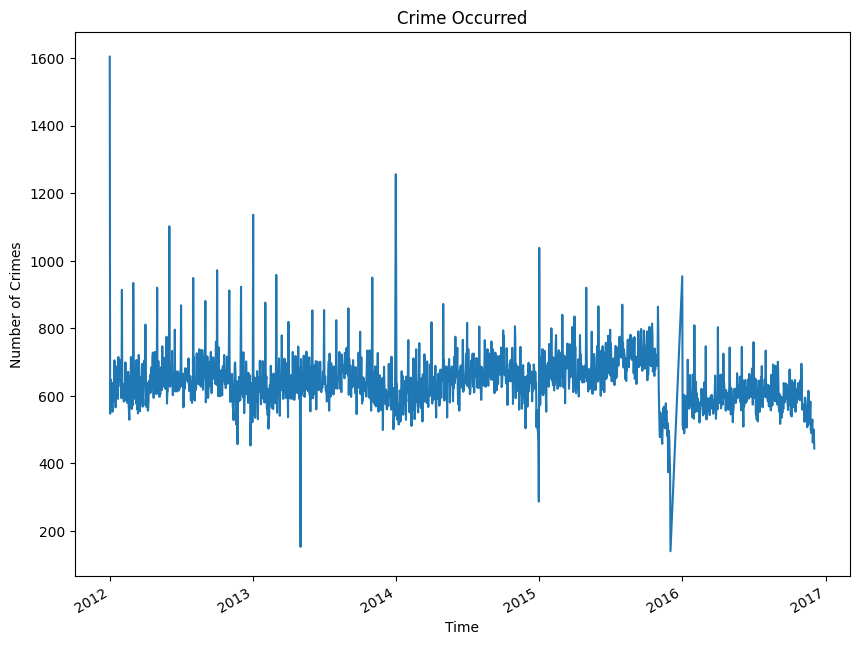

In [22]:
# Graohing Crime Numbers
crOcc = crimeData['DATE.OCC']
crOcc.value_counts().sort_index().plot(figsize=(10, 8))
plt.title('Crime Occurred')
plt.xlabel('Time')
plt.ylabel('Number of Crimes')
plt.show()

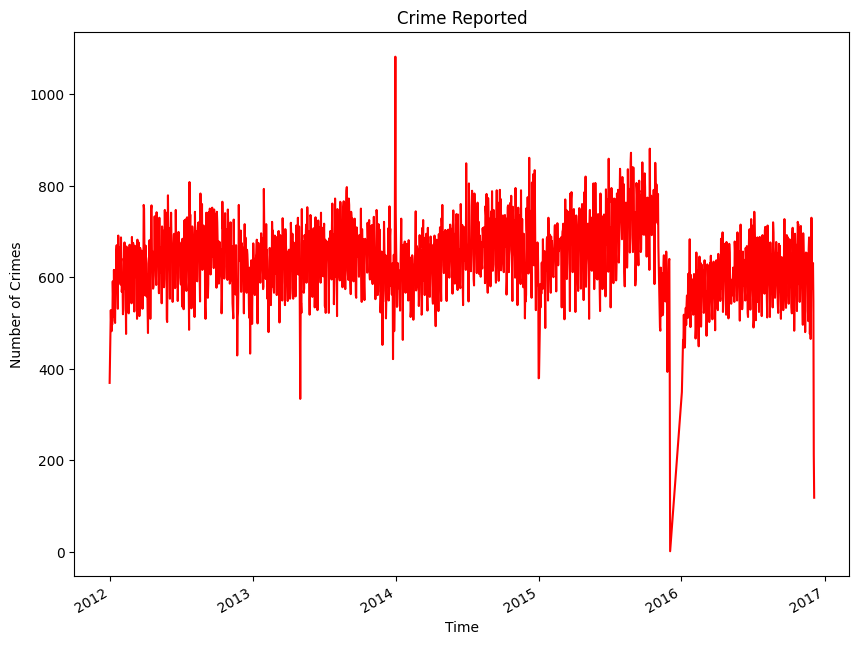

In [23]:
crRptd = crimeData['Date.Rptd']
crRptd.value_counts().sort_index().plot(color='r',figsize=(10, 8))
plt.title('Crime Reported')
plt.xlabel('Time')
plt.ylabel('Number of Crimes')
plt.show()

In [25]:
crRptd.value_counts().tail(1)

Date.Rptd
2015-12-03    1
Name: count, dtype: int64

In [26]:
crOcc.value_counts().tail(1)

DATE.OCC
2015-12-02    140
Name: count, dtype: int64

<Axes: ylabel='count'>

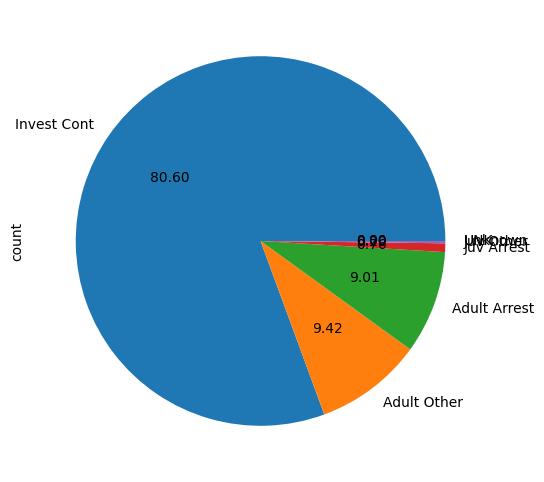

In [28]:
# Crime Status
crimeData['Status.Desc'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(6, 6))

In [29]:
for status in crimeData['Status.Desc'].value_counts().keys():
    temp = crimeData[crimeData['Status.Desc'] == status]['CrmCd.Desc'].value_counts()
    print("Most common crime with {} is {}".format(status,temp.keys()[0]))

Most common crime with Invest Cont is TRAFFIC DR #
Most common crime with Adult Other is BATTERY - SIMPLE ASSAULT
Most common crime with Adult Arrest is SPOUSAL(COHAB) ABUSE - SIMPLE ASSAULT
Most common crime with Juv Arrest is BATTERY - SIMPLE ASSAULT
Most common crime with Juv Other is BATTERY - SIMPLE ASSAULT
Most common crime with Unknown is TRAFFIC DR #
Most common crime with UNK is BUNCO, PETTY THEFT
